<a href="https://colab.research.google.com/github/labhalamanojkumar/Capstoneprojects/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Capstone project 2/SeoulBikeData.csv"
df = pd.read_csv(path,encoding = "ISO-8859-1")

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [ ]:
df.shape

(8760, 14)

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.shape

(8760, 14)

In [ ]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

Functioning Day              0.0
Holiday                      0.0
Seasons                      0.0
Snowfall (cm)                0.0
Rainfall(mm)                 0.0
Solar Radiation (MJ/m2)      0.0
Dew point temperature(°C)    0.0
Visibility (10m)             0.0
Wind speed (m/s)             0.0
Humidity(%)                  0.0
Temperature(°C)              0.0
Hour                         0.0
Rented Bike Count            0.0
Date                         0.0
dtype: float64

In [ ]:
# row-wise null count percentage
#round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)


#Findings :
Dataset has 8760 rows and 14 columns.

Except four column, all other are either float or integer type.

four column are objrct type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

There are no missing / Null values either in columns or rows

In [ ]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

Text(0.5, 1.0, 'Bike rentel count in all Seasons')

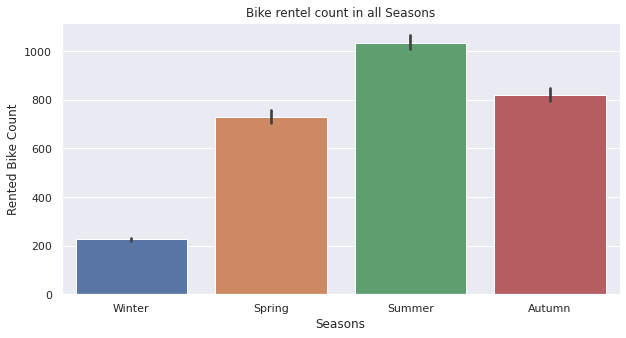

In [ ]:
sns.barplot(x= 'Seasons',y='Rented Bike Count', data=df).set_title("Bike rentel count in all Seasons")

Text(0.5, 1.0, 'Hour and Rented bike count ')

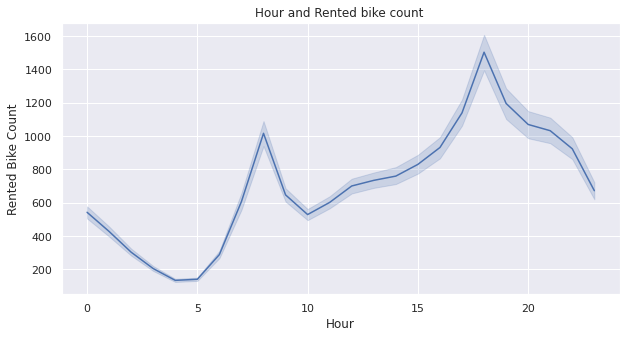

In [ ]:
sns.lineplot(x= 'Hour',y='Rented Bike Count',data=df).set_title('Hour and Rented bike count ')

Text(0.5, 1.0, 'Hour and Rented bike count as per season')

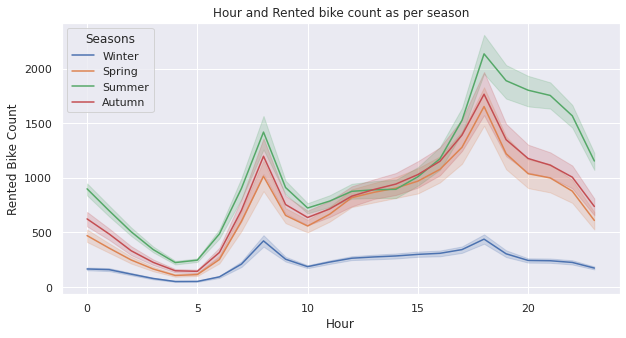

In [ ]:
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons").set_title('Hour and Rented bike count as per season')

Text(0.5, 1.0, 'Temperature effects on Rented bike count')

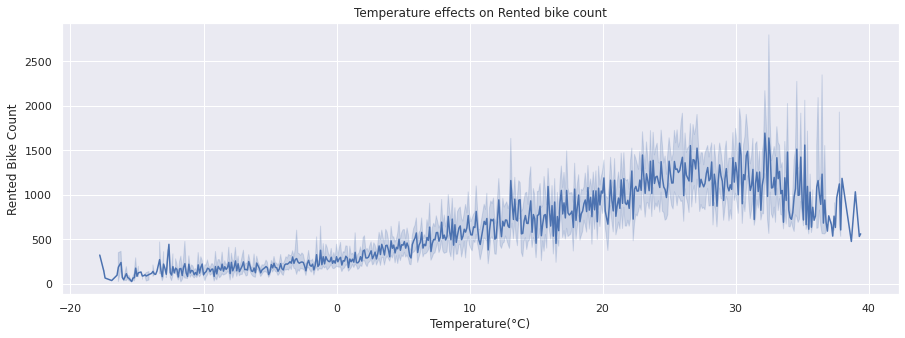

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x= 'Temperature(°C)',y='Rented Bike Count',data=df).set_title('Temperature effects on Rented bike count')

Text(0.5, 1.0, 'Humidity(%) effect on Rented bike count')

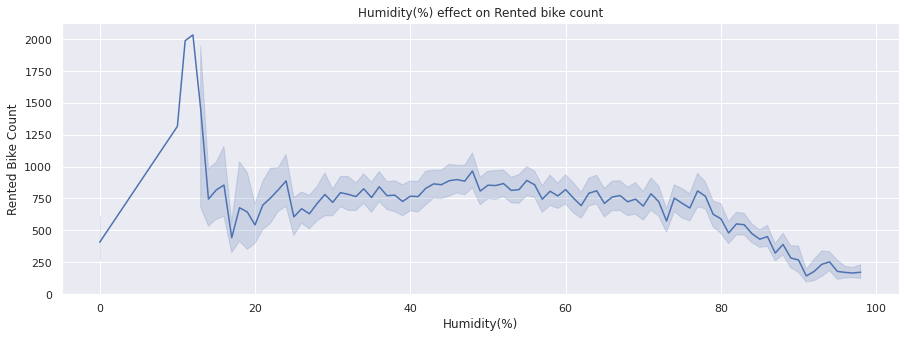

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x= 'Humidity(%)',y='Rented Bike Count',data=df).set_title('Humidity(%) effect on Rented bike count')

Text(0.5, 1.0, 'Snowfall effect on Rented bike count')

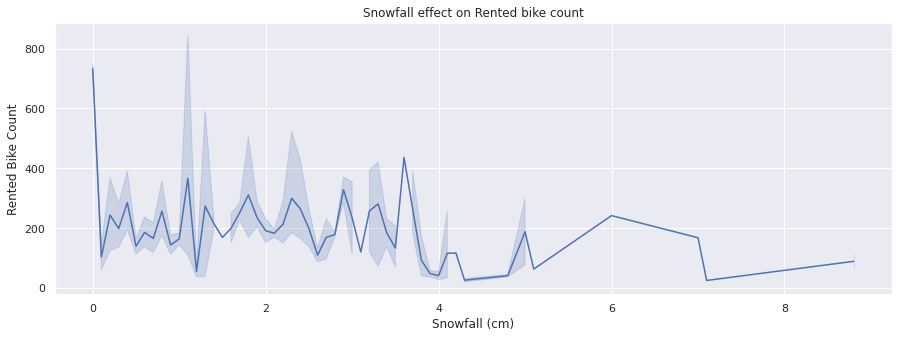

In [ ]:

sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x= 'Snowfall (cm)',y='Rented Bike Count',data=df).set_title('Snowfall effect on Rented bike count')


Text(0.5, 1.0, 'Rented bike count between holiday and non holiday')

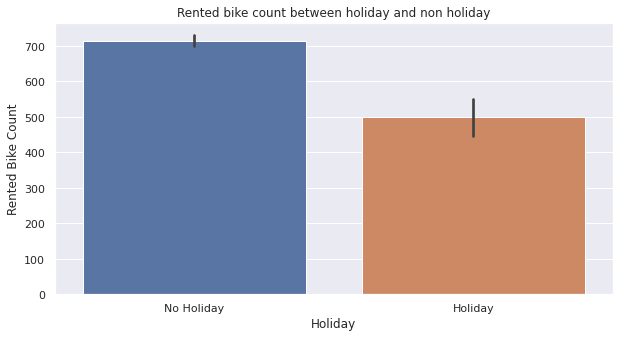

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x= 'Holiday',y='Rented Bike Count', data=df).set_title("Rented bike count between holiday and non holiday")

In [ ]:
df_dup = df.copy()
# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [ ]:
df_dup.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df_dup.shape

(8760, 14)

In [ ]:
df.shape

(8760, 14)

#Insights
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

In [ ]:
# convert the 'Date' column to datetime format
df_dup['Date']= pd.to_datetime(df_dup['Date'])
 

In [ ]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#Data Cleaning
Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

**This is i used for just to cross check if any unknown values are presented in our data set by creating new dummy data set,which should not effect on main dataset.**


In [ ]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

#df_dummy=df.iloc[:,1:16]

In [ ]:
#for col in df_dummy:
 #   print(df_dummy[col].value_counts(ascending=False), '\n\n\n')

#Insights
There seems to be no Junk/Unknown values in the entire dataset.

In [ ]:
df.shape

(8760, 14)

In [ ]:
df_dup.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df_dup["day"] = df_dup['Date'].map(lambda x: x.day)
df_dup["month"] = df_dup['Date'].map(lambda x: x.month)
df_dup["year"] = df_dup['Date'].map(lambda x: x.year)


In [ ]:
df_dup.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


Text(0.5, 1.0, 'Rented bikes in both the Years')

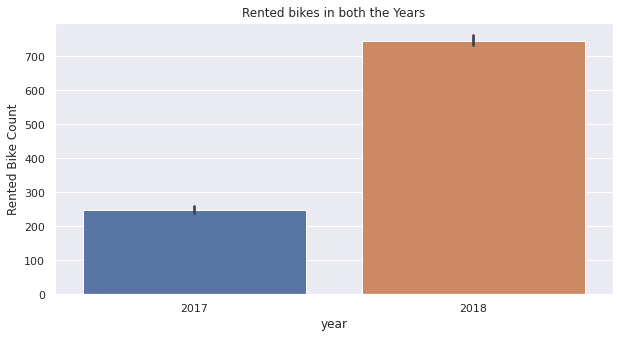

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x= 'year',y='Rented Bike Count', data=df_dup).set_title("Rented bikes in both the Years")

In [ ]:
#changeing "year" column values into to two catagery values  0 and 1
#changeing ""Holiday"" column values into to two catagery values  0 and 1
#changeing "Functioning Day" column values into to two catagery values  0 and 1

df_dup["year"].replace({2017: 0, 2018: 1}, inplace=True)
df_dup["Holiday"].replace({'No Holiday': 0, 'Holiday': 1}, inplace=True)
df_dup["Functioning Day"].replace({'Yes': 0, 'No': 1}, inplace=True)

In [ ]:
df_dup.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,0,12,1,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,0,12,1,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,0,12,1,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,0,12,1,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,0,12,1,0


In [ ]:
df_dup["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
df_dup2 = df_dup.copy()

In [ ]:
df_dup2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,0,12,1,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,0,12,1,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,0,12,1,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,0,12,1,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,0,12,1,0


#Creating Dummy Variables
We will create DUMMY variables for 4 categorical variables 'month', 'day', 'Seasons' .

Before creating dummy variables, we will have to convert them into 'category' data types.

In [ ]:
# Convert to 'category' data type

df_dup['Seasons']=df_dup['Seasons'].astype('category')
df_dup['month']=df_dup['month'].astype('category')
df_dup['day']=df_dup['day'].astype('category')

In [ ]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
df_dup = pd.get_dummies(df_dup, drop_first=True)


In [ ]:
#deleteing "Date" column: 
del df_dup["Date"]

In [ ]:
df_dup.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,Seasons_Spring,Seasons_Summer,Seasons_Winter,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


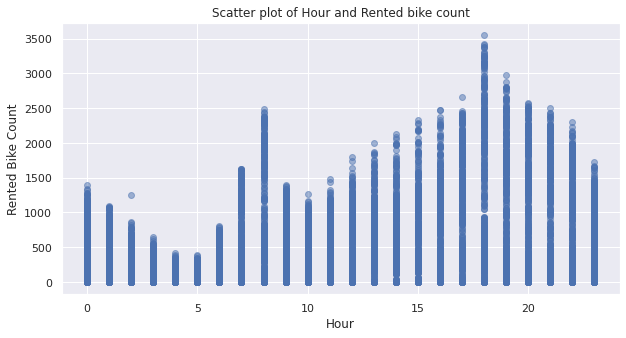

In [ ]:
plt.scatter(df['Hour'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of Hour and Rented bike count')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

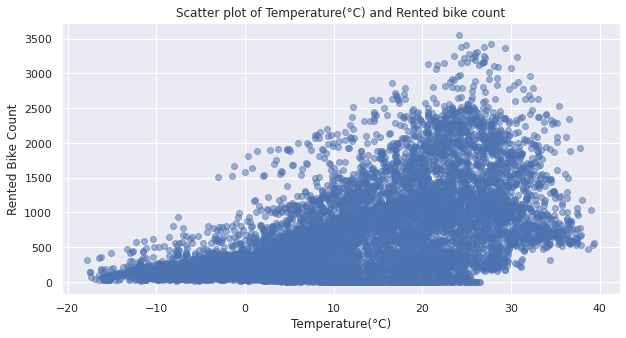

In [ ]:
plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of Temperature(°C) and Rented bike count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

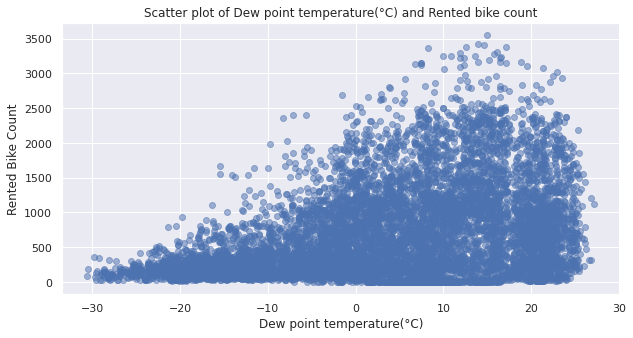

In [ ]:
plt.scatter(df['Dew point temperature(°C)'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of Dew point temperature(°C) and Rented bike count')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

In [ ]:
dependent_variable = 'Rented Bike Count'
# Create a list of independent variables
independent_variables = list(set(df_dup.columns.tolist()) - {dependent_variable})
independent_variables

['day_18',
 'day_3',
 'day_26',
 'day_24',
 'Humidity(%)',
 'year',
 'day_12',
 'day_25',
 'month_5',
 'month_7',
 'day_14',
 'month_6',
 'Snowfall (cm)',
 'day_16',
 'day_19',
 'day_11',
 'Functioning Day',
 'Seasons_Winter',
 'day_7',
 'day_9',
 'month_8',
 'day_6',
 'Visibility (10m)',
 'month_11',
 'month_4',
 'day_10',
 'Temperature(°C)',
 'day_22',
 'day_27',
 'month_10',
 'day_13',
 'day_20',
 'month_3',
 'day_28',
 'day_8',
 'day_29',
 'day_30',
 'day_15',
 'Rainfall(mm)',
 'Dew point temperature(°C)',
 'day_23',
 'Holiday',
 'day_5',
 'day_2',
 'Solar Radiation (MJ/m2)',
 'day_21',
 'day_31',
 'month_9',
 'month_2',
 'day_17',
 'Seasons_Spring',
 'Seasons_Summer',
 'month_12',
 'Hour',
 'Wind speed (m/s)',
 'day_4']

In [ ]:
# Create the data of independent variables
X = df_dup[independent_variables].values

# Create the dependent variable data
y = df_dup[dependent_variable].values

In [ ]:
df_dup[independent_variables].head()

,day_18,day_3,day_26,day_24,Humidity(%),year,day_12,day_25,month_5,month_7,day_14,month_6,Snowfall (cm),day_16,day_19,day_11,Functioning Day,Seasons_Winter,day_7,day_9,month_8,day_6,Visibility (10m),month_11,month_4,day_10,Temperature(°C),day_22,day_27,month_10,day_13,day_20,month_3,day_28,day_8,day_29,day_30,day_15,Rainfall(mm),Dew point temperature(°C),day_23,Holiday,day_5,day_2,Solar Radiation (MJ/m2),day_21,day_31,month_9,month_2,day_17,Seasons_Spring,Seasons_Summer,month_12,Hour,Wind speed (m/s),day_4
0,0,0,0,0,37,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,2000,0,0,0,-5.2,0,0,0,0,0,0,0,0,0,0,0,0.0,-17.6,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,2.2,0
1,0,0,0,0,38,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,2000,0,0,0,-5.5,0,0,0,0,0,0,0,0,0,0,0,0.0,-17.6,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0.8,0
2,0,0,0,0,39,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,2000,0,0,0,-6.0,0,0,0,0,0,0,0,0,0,0,0,0.0,-17.7,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,1.0,0
3,0,0,0,0,40,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,2000,0,0,0,-6.2,0,0,0,0,0,0,0,0,0,0,0,0.0,-17.6,0,0,0,0,0.0,0,0,0,0,0,0,0,0,3,0.9,0
4,0,0,0,0,36,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,2000,0,0,0,-6.0,0,0,0,0,0,0,0,0,0,0,0,0.0,-18.6,0,0,0,0,0.0,0,0,0,0,0,0,0,0,4,2.3,0


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_

124.99180065919165

In [ ]:
regressor.coef_

array([-4.13897918e+01, -1.29526618e+02, -1.98609620e+01, -4.19450469e+01,
       -1.03956970e+03, -1.77214871e+01,  3.19077555e+01,  5.59851015e+01,
        5.42934534e+01, -1.53372595e+01,  1.63030846e+01,  2.81087819e+02,
        3.45324935e+02, -4.49089726e-01, -8.05246390e-01,  2.66348849e+01,
       -9.59502310e+02, -2.70826152e+02,  1.05969685e+02, -6.91461496e+01,
       -3.49239025e+01,  3.66500755e+02,  8.21093711e+01,  6.25119764e+00,
        1.97643268e+01,  5.71288898e+01,  1.24290341e+03, -7.54989377e+01,
        5.31001333e+01,  9.25441461e+01,  1.21692816e+02, -7.22556535e+00,
       -4.18845848e+01, -6.38504739e+01, -3.30329913e+02, -2.69732380e+01,
        5.25552789e+01,  1.69222646e+00, -2.11697885e+03,  6.07777842e+02,
       -3.36887253e+01, -1.54685045e+02,  7.80417908e+01, -6.63870751e+00,
       -3.27072134e+02,  5.71749275e-01,  3.67496727e+01, -3.48021629e+01,
       -5.51087728e+01,  1.78939508e+01, -9.69579234e+01, -2.64755301e+02,
        3.45442066e+01,  

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

171934.04212331676

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

412.46234278303274

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

414.64930016016757

In [ ]:
r2_score(y_train, y_pred_train)

0.5894199240688551

In [ ]:
r2_score(y_test, y_pred)

0.5929261096840837

In [ ]:
df_dup.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,Seasons_Spring,Seasons_Summer,Seasons_Winter,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Root Mean Squared Logarithmic Error
def rmsle(prediction, actual):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in prediction]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
from sklearn import linear_model
#construct linear regression model 1
#model 1 includes all features
train_x = df_dup.drop(['Rented Bike Count'], axis = 1)
train_y = df_dup['Rented Bike Count'].values
lrm_1 = linear_model.LinearRegression().fit(train_x, train_y)
lrm_1.coef_

array([ 2.63289875e+01,  2.00420845e+01, -1.11577694e+01,  2.27454894e+01,
        4.22677106e-02,  1.25426645e+01, -9.52193393e+01, -5.88855120e+01,
        4.08255152e+01, -1.33807881e+02, -9.60349269e+02, -1.42842329e+01,
       -8.39531877e+01, -2.44061372e+02, -2.57995297e+02, -1.59022394e+01,
       -1.17707526e+02, -4.32804125e+01,  9.21799855e+01,  3.76246174e+02,
        1.17915292e+02, -3.16995466e+02, -3.27341360e+01,  7.81471719e+01,
        6.78762017e+01,  5.23150615e+01,  1.36359851e+02,  3.31054395e+01,
        9.51066030e+00, -1.44157619e+01,  2.65838922e+01, -3.32349644e+01,
        1.48388762e+01,  6.32847631e-01, -3.52877289e+00, -6.75359416e+01,
       -2.85157293e+01, -2.75857007e+01,  5.86896451e+01, -2.52705755e+01,
        4.03143743e+01, -6.24873502e+01, -1.18879915e+01,  3.85426061e+01,
        3.91644562e+01, -6.29689445e+01, -4.27272652e+01,  1.03280497e+01,
        7.05350836e+01,  2.70568137e+02, -2.51981766e+01, -4.72291086e+01,
       -2.24695049e+01,  

In [ ]:
#prepare prediction result
prediction = lrm_1.predict(train_x)
i = 0
for v in prediction:
    if prediction[i] < 0:
        prediction[i] = 0
    i = i + 1

RMSLE:  1.7038777192255523


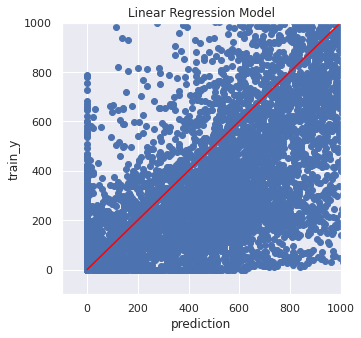

In [ ]:
#visualize lrm_1
plt.figure(figsize=(5, 5))
plt.scatter(prediction, train_y)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('train_y')
plt.title('Linear Regression Model')

print("RMSLE: ", rmsle(prediction, train_y))

this model does not fit well. next: visualizing and analyzing data

In [ ]:
#construct linear regression model 2 according to hours
train_hour = df_dup.copy()
#train_hour['hour'] = train_hour.datetime.apply(lambda x : x.hour)

train_hour_1 = train_hour.loc[train_hour['Hour'] < 5]
x_hour_1 = train_hour_1.drop(['Rented Bike Count'], axis = 1)
                             
train_hour_2 = train_hour.loc[(train_hour['Hour'] >= 5) & (train_hour['Hour'] < 9)]
x_hour_2 = train_hour_2.drop(['Rented Bike Count'], axis = 1)
                             
train_hour_3 = train_hour.loc[(train_hour['Hour'] >= 9) & (train_hour['Hour'] < 13)]
x_hour_3 = train_hour_3.drop(['Rented Bike Count'], axis = 1)
                             
train_hour_4 = train_hour.loc[(train_hour['Hour'] >= 13) & (train_hour['Hour'] < 17)]
x_hour_4 = train_hour_4.drop(['Rented Bike Count'], axis = 1)
                             
train_hour_5 = train_hour.loc[train_hour['Hour'] >= 17]
x_hour_5 = train_hour_5.drop(['Rented Bike Count'], axis = 1)

lrm_hour1 = linear_model.LinearRegression().fit(x_hour_1, train_hour_1['Rented Bike Count'].values)
lrm_hour2 = linear_model.LinearRegression().fit(x_hour_2, train_hour_2['Rented Bike Count'].values)
lrm_hour3 = linear_model.LinearRegression().fit(x_hour_3, train_hour_3['Rented Bike Count'].values)
lrm_hour4 = linear_model.LinearRegression().fit(x_hour_4, train_hour_4['Rented Bike Count'].values)
lrm_hour5 = linear_model.LinearRegression().fit(x_hour_5, train_hour_5['Rented Bike Count'].values)
lrm_hour5.coef_

array([-4.41975930e+01, -4.01113486e+01, -3.65809313e+01,  6.15705545e+00,
        2.59247736e-02,  9.49828604e+01, -6.24410877e+01, -6.48584947e+01,
        1.01330355e+02, -2.44626715e+02, -1.42959916e+03,  1.00494268e+02,
       -1.43170747e+02, -2.47465243e+02, -3.42235326e+02, -2.65491015e+01,
       -2.24485534e+02,  1.37682709e+01,  2.29916596e+02,  5.49247680e+02,
        1.93891955e+02, -4.46467020e+02,  1.58906394e+01,  1.02740838e+02,
        7.05415872e+01,  2.06338664e+02,  2.34750208e+02, -3.70660212e+00,
        3.51673913e+01,  6.52409143e+01,  5.22897050e+01, -9.78995063e+01,
        6.92830591e+01,  2.20872228e+01,  1.54942297e+02, -7.24284707e+01,
        3.04381217e-01,  5.81491669e+01,  1.06252728e+02, -4.72378135e+01,
        8.66864379e+01,  3.05976849e+01, -2.04965369e+01,  7.02869133e+01,
        4.86266973e+01, -9.84052933e+01, -3.90945635e+01,  4.26165298e+01,
        2.06243343e+02,  3.66940029e+02, -6.90705966e+01,  2.21192321e+01,
       -1.11590428e+01,  

In [ ]:
#prepare prediction result
result_hour1 = lrm_hour1.predict(x_hour_1)
i = 0
for v in result_hour1:
    if result_hour1[i] < 0:
        result_hour1[i] = 0
    i = i + 1
result_hour2 = lrm_hour2.predict(x_hour_2)
i = 0
for v in result_hour2:
    if result_hour2[i] < 0:
        result_hour2[i] = 0
    i = i + 1
result_hour3 = lrm_hour3.predict(x_hour_3)
i = 0
for v in result_hour3:
    if result_hour3[i] < 0:
        result_hour3[i] = 0
    i = i + 1
result_hour4 = lrm_hour4.predict(x_hour_4)
i = 0
for v in result_hour4:
    if result_hour4[i] < 0:
        result_hour4[i] = 0
    i = i + 1
result_hour5 = lrm_hour5.predict(x_hour_5)
i = 0
for v in result_hour5:
    if result_hour5[i] < 0:
        result_hour5[i] = 0
    i = i + 1

RMSLE:  1.4348663596469964


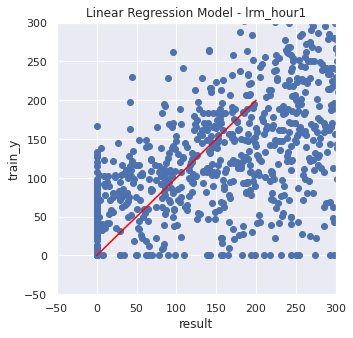

In [ ]:
#visualize lrm_hour1
plt.figure(figsize=(5, 5))
plt.scatter(result_hour1, train_hour_1['Rented Bike Count'].values)
plt.plot( [0,200],[0,200], color='red')
plt.xlim(-50, 300)
plt.ylim(-50, 300)
plt.xlabel('result')
plt.ylabel('train_y')
plt.title('Linear Regression Model - lrm_hour1')
print("RMSLE: ", rmsle(result_hour1, train_hour_1['Rented Bike Count'].values))

RMSLE:  1.570058635307976


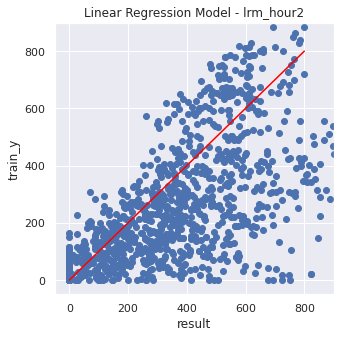

In [ ]:
#visualize lrm_hour2
plt.figure(figsize=(5, 5))
plt.scatter(result_hour2, train_hour_2['Rented Bike Count'].values)
plt.plot( [0,800],[0,800], color='red')
plt.xlim(-50, 900)
plt.ylim(-50, 900)
plt.xlabel('result')
plt.ylabel('train_y')
plt.title('Linear Regression Model - lrm_hour2')
print("RMSLE: ", rmsle(result_hour2, train_hour_2['Rented Bike Count'].values))

RMSLE:  0.8992875996068923


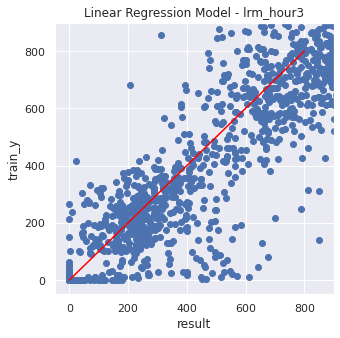

In [ ]:
#visualize lrm_hour3
plt.figure(figsize=(5, 5))
plt.scatter(result_hour3, train_hour_3['Rented Bike Count'].values)
plt.plot( [0,800],[0,800], color='red')
plt.xlim(-50, 900)
plt.ylim(-50, 900)
plt.xlabel('result')
plt.ylabel('train_y')
plt.title('Linear Regression Model - lrm_hour3')
print("RMSLE: ", rmsle(result_hour3, train_hour_3['Rented Bike Count'].values))

RMSLE:  1.0482966470732205


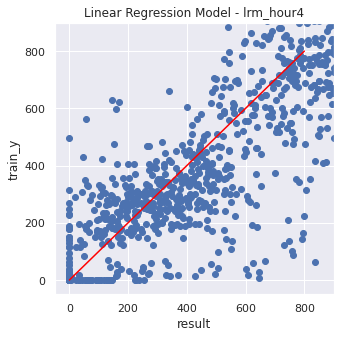

In [ ]:
#visualize lrm_hour4
plt.figure(figsize=(5, 5))
plt.scatter(result_hour4, train_hour_4['Rented Bike Count'].values)
plt.plot( [0,800],[0,800], color='red')
plt.xlim(-50, 900)
plt.ylim(-50, 900)
plt.xlabel('result')
plt.ylabel('train_y')
plt.title('Linear Regression Model - lrm_hour4')
print("RMSLE: ", rmsle(result_hour4, train_hour_4['Rented Bike Count'].values))

RMSLE:  1.4925587827835431


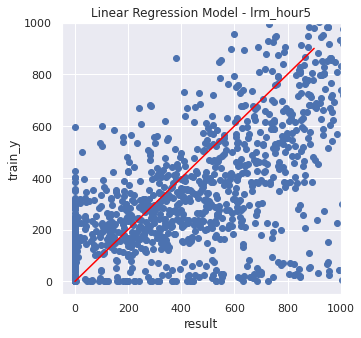

In [ ]:
#visualize lrm_hour5
plt.figure(figsize=(5, 5))
plt.scatter(result_hour5, train_hour_5['Rented Bike Count'].values)
plt.plot( [0,900],[0,900], color='red')
plt.xlim(-50, 1000)
plt.ylim(-50, 1000)
plt.xlabel('result')
plt.ylabel('train_y')
plt.title('Linear Regression Model - lrm_hour5')
print("RMSLE: ", rmsle(result_hour5, train_hour_5['Rented Bike Count'].values))

RMSLE:  0.38864551664602687


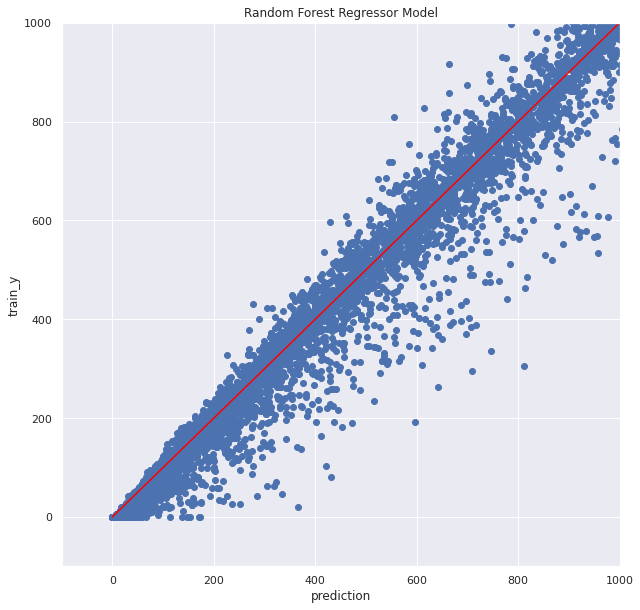

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(train_x, train_y)
prediction_rfr = rfr.predict(train_x)

#visualize
plt.figure(figsize=(10, 10))
plt.scatter(prediction_rfr, train_y)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('train_y')
plt.title('Random Forest Regressor Model')

print("RMSLE: ", rmsle(prediction_rfr, train_y))